## WEEK-4-Exploratory Data Analysis (EDA)

**Importing the libraries**

In [1]:
import seaborn as sns

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt



**Loading the dataset**

In [2]:
df = pd.read_csv(r"C:\Users\asinf\OneDrive\Desktop\healthcare_dataset.csv")
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


**Data cleaning**

In [7]:


#  Drop duplicates
df.drop_duplicates(inplace=True)

# Handle missing values
missing = df.isnull().sum()
print("Missing values:\n", missing)

# Drop columns with too many missing values (if any)
# df.drop(columns=['column_name'], inplace=True)

# Fill missing values (example strategies below)
# df['Column'] = df['Column'].fillna('Unknown')  # For categorical
# df['Column'] = df['Column'].fillna(df['Column'].mean())  # For numerical

# Standardize column names (optional)
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

#  Clean text fields (remove extra spaces, capitalize consistently)
df['name'] = df['name'].str.title().str.strip()
df['gender'] = df['gender'].str.capitalize().str.strip()
df['blood_type'] = df['blood_type'].str.upper().str.strip()
df['medical_condition'] = df['medical_condition'].str.capitalize().str.strip()

df.head()


Missing values:
 Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
Admission Month       0
Admission Year        0
Length of Stay        0
dtype: int64


,name,age,gender,blood_type,medical_condition,date_of_admission,doctor,hospital,insurance_provider,billing_amount,room_number,admission_type,discharge_date,medication,test_results,admission_month,admission_year,length_of_stay
0,Bobby Jackson,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal,1,2024,2
1,Leslie Terry,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive,8,2019,6
2,Danny Smith,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal,9,2022,15
3,Andrew Watts,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal,11,2020,30
4,Adrienne Bell,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal,9,2022,20


**Overview of the dataset**

In [8]:
print("Shape of the dataset:", df.shape)

print("\nColumns in the dataset:\n", df.columns)

# Check for missing values

print("\nMissing values in each column:\n", df.isnull().sum())

# Data types and summary statistics

print("\nData types:\n", df.dtypes)

print("\nSummary Statistics:\n", df.describe(include='all'))

#checking the missing values
print("\nMissing values in each column:\n", df.isnull().sum())

print("\nPercentage of missing values in each column:\n", (df.isnull().sum()/len(df))*100)

Shape of the dataset: (54966, 18)

Columns in the dataset:
 Index(['name', 'age', 'gender', 'blood_type', 'medical_condition',
       'date_of_admission', 'doctor', 'hospital', 'insurance_provider',
       'billing_amount', 'room_number', 'admission_type', 'discharge_date',
       'medication', 'test_results', 'admission_month', 'admission_year',
       'length_of_stay'],
      dtype='object')

Missing values in each column:
 name                  0
age                   0
gender                0
blood_type            0
medical_condition     0
date_of_admission     0
doctor                0
hospital              0
insurance_provider    0
billing_amount        0
room_number           0
admission_type        0
discharge_date        0
medication            0
test_results          0
admission_month       0
admission_year        0
length_of_stay        0
dtype: int64

Data types:
 name                          object
age                            int64
gender                        object


**Since there are no missing values the heatmap will be like the one shown below**

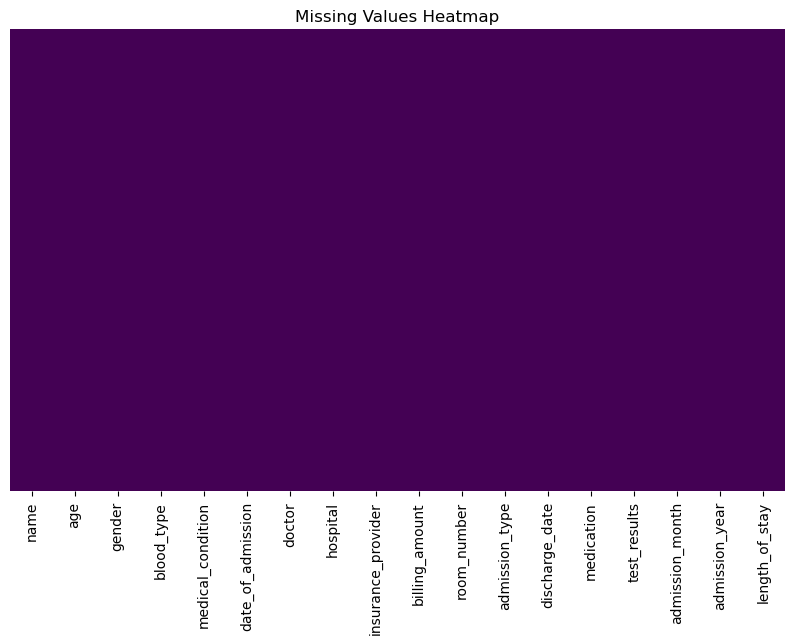

In [9]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Values Heatmap')
plt.show()

**Univariate Analysis**

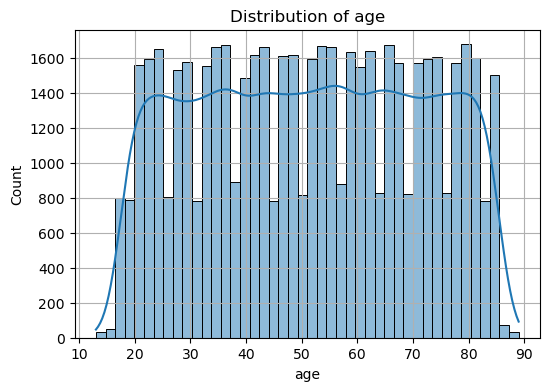

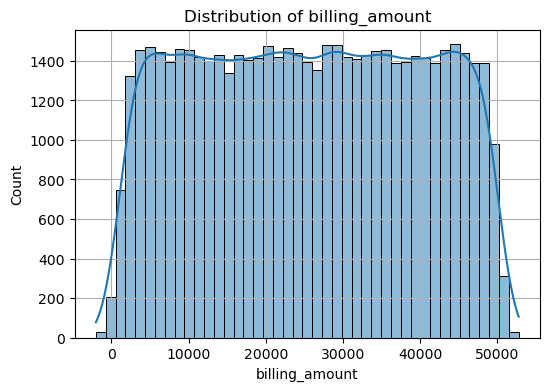

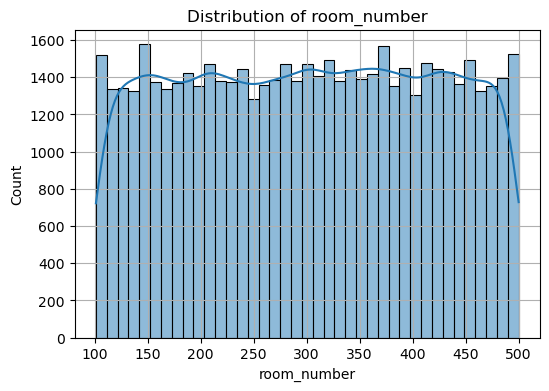

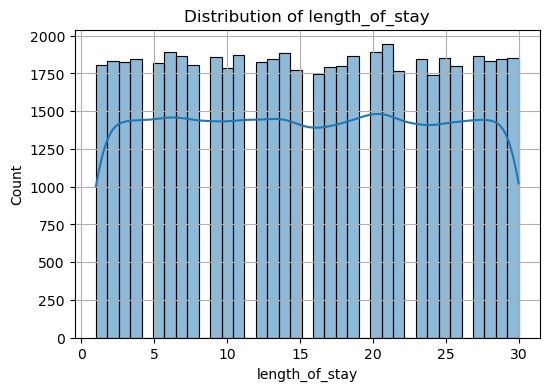

In [ ]:
# Numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.grid(True)
    plt.show()

# Categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Value Counts of {col}')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

**Bivariate Analysis**

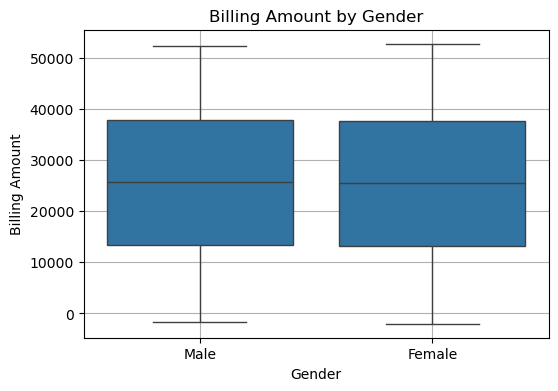

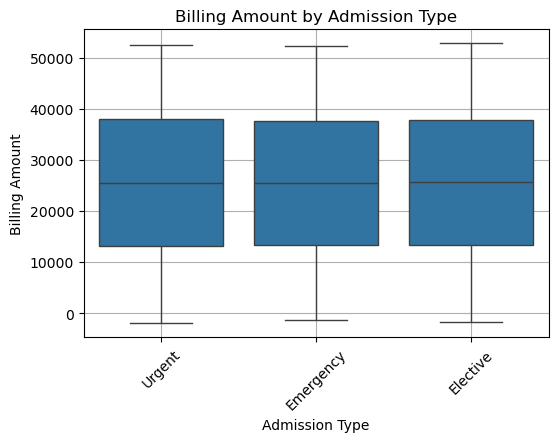

In [3]:
# Gender vs Billing Amount
plt.figure(figsize=(6, 4))
sns.boxplot(x='Gender', y='Billing Amount', data=df)
plt.title('Billing Amount by Gender')
plt.grid(True)
plt.show()

# Admission Type vs Billing Amount
plt.figure(figsize=(6, 4))
sns.boxplot(x='Admission Type', y='Billing Amount', data=df)
plt.title('Billing Amount by Admission Type')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

**Feature Engineering**

In [4]:
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'])

# New features
df['Admission Month'] = df['Date of Admission'].dt.month
df['Admission Year'] = df['Date of Admission'].dt.year
df['Length of Stay'] = (df['Discharge Date'] - df['Date of Admission']).dt.days

# View new features
df[['Admission Month', 'Admission Year', 'Length of Stay']].head()

,Admission Month,Admission Year,Length of Stay
0,1,2024,2
1,8,2019,6
2,9,2022,15
3,11,2020,30
4,9,2022,20


**Correlation Heatmap**

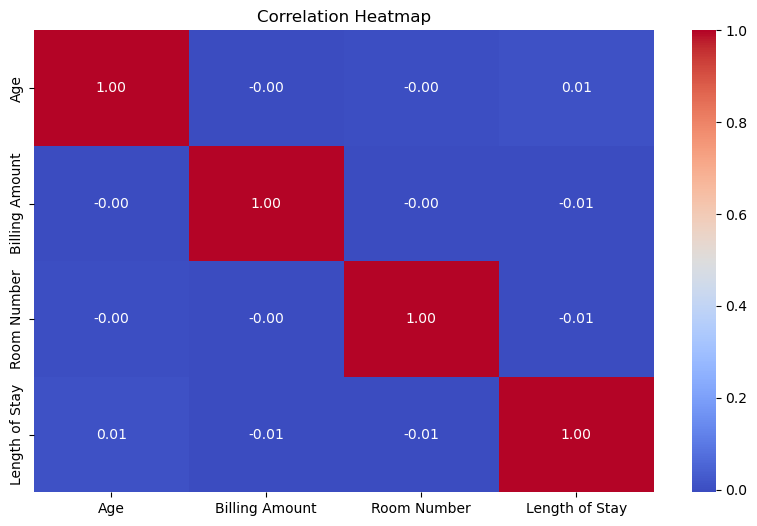

In [5]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.select_dtypes(include=['int64', 'float64']).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# 📊 Insights from Analysis

---

##  Findings

###  Gender
- **Female patients** tend to incur slightly higher billing amounts compared to males.
- Gender distribution is slightly skewed towards **females**, indicating higher admission frequency or longer treatments.

---

### Admission Type
- **Emergency cases** are billed higher on average than elective or urgent cases.
- **Elective admissions** tend to have the lowest average billing amount, indicating planned and possibly shorter treatments.

---

### Age
- Majority of patients fall in the **adult to senior age group (30–70 years)**.
- Children and very elderly patients are comparatively fewer in the dataset.

---

###  Medical Condition
- The most common conditions treated were **Diabetes**, **Cancer**, and **Obesity**.
- **Obesity cases** had a noticeable range in billing amounts, possibly due to variability in treatment complexity.

---

### Length of Stay
- Longer hospital stays (10+ days) are strongly correlated with **higher billing amounts**.
- A few outliers exist with **very short or very long stays**, which significantly impact the overall billing trends.

---

###  Hospital & Insurance
- Some hospitals consistently charge higher than others, even for similar admission types.
- **Insurance providers** like **Blue Cross** and **Medicare** were the most common, possibly reflecting socioeconomic status or regional coverage trends.

---

### Time Trends
- Admissions are fairly evenly distributed across months, with slight peaks in **September** and **January**, possibly related to seasonal illnesses or insurance cycles.

#  Conclusion

The exploratory data analysis (EDA) of the healthcare dataset revealed meaningful insights into patient demographics, billing trends, and treatment patterns. Key factors such as gender, admission type, and length of stay were found to significantly influence billing amounts. Feature engineering helped to extract time-based trends, and advanced visualization via correlation heatmap highlighted relationships among numerical variables.

---

#  Recommendations for Future Analysis

- **Predictive Modeling:** Build models to predict billing amounts or length of stay using patient features.
- **Survival Analysis:** If available, add a survival status or health outcome column to assess treatment effectiveness and patient risk factors.
- **Clustering:** Use clustering (like K-means) to group patients based on medical and financial features for hospital resource planning.
- **Temporal Trends:** Explore year-wise and seasonal changes in admission types and conditions, particularly around flu season or policy changes.
- **Cost Optimization:** Analyze treatment vs billing by hospital or doctor to identify cost-saving opportunities.

---

#  Final Observation

The dataset is well-structured and provides rich patient-related data, offering potential for deeper clinical and operational insights. While the current EDA offers a foundational understanding, integrating clinical outcomes and treatment details in future datasets would unlock more advanced health analytics. Effective use of this data can enhance decision-making in healthcare management, optimize costs, and improve patient care.
